Through my client, I had my hands on a dataset from PetSmart to analyze what causes them to loose customers. 

PetSmart customer data that includes 7.4K rows and 26 features such as sales, recency, loyalty, discounts, and demographics. Each row represents aggregated and summarized data for a single customer for one year period. 

The target variable is calculated as 90 days customer churn. So I had 25 features to predict the target variable initially. But from these I have eliminated some of them due to multicollinearity and also I have dummy coded some categorical variables and removed missing values. 

Also I have scaled them with standard scaler. 

For the analysis part, I have used logistic regression, random forest, KNN. 

Alternatively I run all algorithms on the data set after I have balanced the target variable with SMOTE technique. 

Eventually random forest and logistics regression models had precision score of 0.75 and 0.74 respectfully. 

### EDA, Processing & Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score
import itertools
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support


%matplotlib inline

In [ ]:

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed

In [ ]:
df = pd.read_csv('Data Scientist Work Sample Exercise (Data).csv')

In [ ]:
df.head()

,total_sales,total_margin,total_units,total_txns,upt,spt,median_time_between_visit,days_from_last_visit,days_from_first_visit,std_time_between_visit,has_loyalty,profile_complete,species_group,visit_frequency,estimated_household_income_in_dollars,population_density,home_property_type,estimated_home_market_value_in_dollars,home_owner_or_renter,loyalty_discounts,cpn_discount,price_match_discounts,promo_discount,employee_discount,90_day_churn,90_day_sales
0,356.74,174.832,59,11,5.3636,32.4309,69,2,829,73.40,1,0,MultiSpecies,8,50000 to 74999,Rural areas - HHs/sq mile 30 - 109,Apartment,"350,000 - 399,999",Home Owner,28.81,0.00,0.0,28.81,0.0,0,354.97
1,964.08,423.641,383,51,7.5098,18.9035,4,3,2190,26.30,1,0,Dog+Cat,47,Greater than 124999,"City and Surrounds - HHs/sq mile 935 - 1,327",Single,"150,000 - 174,999",Home Owner,24.55,11.05,0.0,37.64,0.0,0,285.47
2,311.67,202.542,21,7,3.0000,44.5243,8,128,452,110.81,1,1,Dog,7,Greater than 124999,"City and Surrounds - HHs/sq mile 3,159 - 4,430",Apartment,"125,000 - 149,999",Renter,7.12,0.00,0.0,7.12,0.0,1,0.00
3,50.45,25.973,5,1,5.0000,50.4500,251,251,251,0.00,1,1,Dog,1,40000 to 49999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Single,"225,000 - 249,999",Home Owner,4.50,0.00,0.0,4.50,0.0,1,0.00
4,255.74,105.050,12,6,2.0000,42.6233,63,234,2122,4.04,1,0,Dog,6,75000 to 99999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Condo,"125,000 - 149,999",Home Owner,5.00,20.00,0.0,35.76,0.0,1,0.00


#### basic information about data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_sales                             7403 non-null   float64
 1   total_margin                            7403 non-null   float64
 2   total_units                             7403 non-null   int64  
 3   total_txns                              7403 non-null   int64  
 4   upt                                     7403 non-null   float64
 5   spt                                     7403 non-null   float64
 6   median_time_between_visit               7403 non-null   int64  
 7   days_from_last_visit                    7403 non-null   int64  
 8   days_from_first_visit                   7403 non-null   int64  
 9   std_time_between_visit                  7403 non-null   float64
 10  has_loyalty                             7403 non-null   int6

In [ ]:
df.describe()

,total_sales,total_margin,total_units,total_txns,upt,spt,median_time_between_visit,days_from_last_visit,days_from_first_visit,std_time_between_visit,has_loyalty,profile_complete,visit_frequency,loyalty_discounts,cpn_discount,price_match_discounts,promo_discount,employee_discount,90_day_churn,90_day_sales
count,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.0,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000
mean,497.763231,239.016348,76.161421,10.751182,4.925949,48.119303,61.349183,89.164933,1349.975280,37.829543,1.0,0.611779,10.043091,30.180151,4.590583,4.248986,42.796822,1.221148,0.416453,84.350098
std,624.788678,286.522855,275.371698,11.920692,8.273318,31.476528,78.391526,98.886326,754.519115,43.891152,0.0,0.487378,11.072684,50.923795,21.881650,23.632387,85.181646,20.591730,0.493004,142.585765
min,0.420000,-266.346000,1.000000,1.000000,1.000000,0.420000,1.000000,0.000000,12.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.995000,63.943500,8.000000,3.000000,2.000000,29.261000,16.000000,14.000000,626.000000,7.690000,1.0,0.000000,3.000000,2.500000,0.000000,0.000000,3.720000,0.000000,0.000000,0.000000
50%,292.880000,146.016000,21.000000,7.000000,3.000000,42.715000,32.000000,46.000000,1492.000000,25.570000,1.0,1.000000,6.000000,12.510000,0.000000,0.000000,17.000000,0.000000,0.000000,29.390000
75%,631.665000,306.105500,50.000000,14.000000,4.615400,59.278600,69.000000,134.000000,2113.000000,52.220000,1.0,1.000000,13.000000,36.000000,0.000000,0.000000,48.420000,0.000000,1.000000,112.260000
max,10198.090000,3133.204000,9665.000000,139.000000,171.225800,633.466700,513.000000,389.000000,2192.000000,360.620000,1.0,1.000000,129.000000,964.820000,694.710000,875.370000,1891.930000,655.810000,1.000000,2244.340000


 #### species group

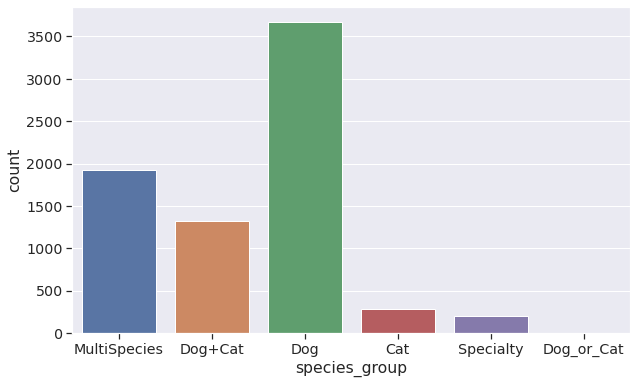

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'species_group' , data = df)

In [ ]:
df.isnull().sum()

total_sales                                 0
total_margin                                0
total_units                                 0
total_txns                                  0
upt                                         0
spt                                         0
median_time_between_visit                   0
days_from_last_visit                        0
days_from_first_visit                       0
std_time_between_visit                      0
has_loyalty                                 0
profile_complete                            0
species_group                               0
visit_frequency                             0
estimated_household_income_in_dollars       0
population_density                          0
home_property_type                          0
estimated_home_market_value_in_dollars    370
home_owner_or_renter                        0
loyalty_discounts                           0
cpn_discount                                0
price_match_discounts             

#### estimated_home_market_value_in_dollars

In [ ]:
df['estimated_home_market_value_in_dollars'].unique()

array(['350,000 - 399,999', '150,000 - 174,999', '125,000 - 149,999',
       '225,000 - 249,999', '250,000 - 274,999', '500,000 - 749,999',
       '300,000 - 349,999', '175,000 - 199,999', '75,000 - 99,999',
       '400,000 - 449,999', '50,000 - 74,999', '100,000 - 124,999',
       '200,000 - 224,999', '275,000 - 299,999', nan, '450,000 - 499,999',
       '750,000 - 999,999', '1,000 - 24,999', '25,000 - 49,999',
       '1,000,000 Plus'], dtype=object)

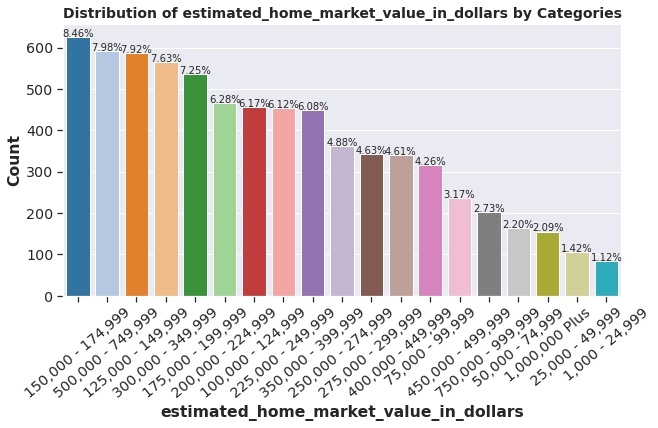

estimated_home_market_value_in_dollars Value Counts

150,000 - 174,999    626
500,000 - 749,999    591
125,000 - 149,999    586
300,000 - 349,999    565
175,000 - 199,999    537
200,000 - 224,999    465
100,000 - 124,999    457
225,000 - 249,999    453
350,000 - 399,999    450
250,000 - 274,999    361
275,000 - 299,999    343
400,000 - 449,999    341
75,000 - 99,999      315
450,000 - 499,999    235
750,000 - 999,999    202
50,000 - 74,999      163
1,000,000 Plus       155
25,000 - 49,999      105
1,000 - 24,999        83
Name: estimated_home_market_value_in_dollars, dtype: int64


In [ ]:
# plot the categories of the column
_ = plt.figure(figsize=(10,5))
ax = sns.countplot(x='estimated_home_market_value_in_dollars', data=df, order=df['estimated_home_market_value_in_dollars'].value_counts().index,palette='tab20')
_ = plt.title('Distribution of estimated_home_market_value_in_dollars by Categories', fontsize=14, fontweight='bold')
_ = plt.ylabel('Count', fontweight='bold')
_ = plt.xlabel('estimated_home_market_value_in_dollars', fontweight='bold')
_ = plt.xticks(rotation=40)

# calculate the percentages of the category
sizes=[]
total_data = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+1,
            '{:1.2f}%'.format(height/total_data*100), ha="center", fontsize=10)

# display the plot
plt.show()

#customer spend type
print('estimated_home_market_value_in_dollars Value Counts')
print('')

print(df['estimated_home_market_value_in_dollars'].value_counts())

In [ ]:
df['estimated_home_market_value_in_dollars'].value_counts().mean()

370.1578947368421

In [ ]:
df['estimated_home_market_value_in_dollars'].value_counts().median()

361.0

In [ ]:
df['estimated_home_market_value_in_dollars'].describe()

count                  7033
unique                   19
top       150,000 - 174,999
freq                    626
Name: estimated_home_market_value_in_dollars, dtype: object

#### has loyalty

In [ ]:
df['has_loyalty'].nunique()

1

In [ ]:
df['has_loyalty'].unique()

array([1])



####  90 day churn


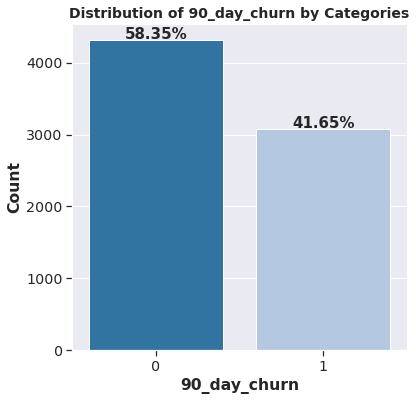

90_day_churn Value Counts

0    4320
1    3083
Name: 90_day_churn, dtype: int64


In [ ]:
#fig = plt.figure(figsize = (10,6))
#sns.countplot(x = '90_day_churn' , data = df)


# plot the categories of Type column
_ = plt.figure(figsize=(6,6))
ax = sns.countplot(x='90_day_churn', data=df, order=df['90_day_churn'].value_counts().index,palette='tab20')
_ = plt.title('Distribution of 90_day_churn by Categories', fontsize=14, fontweight='bold')
_ = plt.ylabel('Count', fontweight='bold')
_ = plt.xlabel('90_day_churn', fontweight='bold')
#_ = plt.xticks(rotation=40)

# calculate the percentages of the category
sizes=[]
total_data = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+4,
            '{:1.2f}%'.format(height/total_data*100), ha="center", fontsize=15,fontweight='bold')

# display the plot
plt.show()

# column 90_day_churn
print('90_day_churn Value Counts')
print('')

print(df['90_day_churn'].value_counts())

In [ ]:
print('percentages of classes')
df['90_day_churn'].value_counts(normalize=True)*100

percentages of classes


0    58.354721
1    41.645279
Name: 90_day_churn, dtype: float64

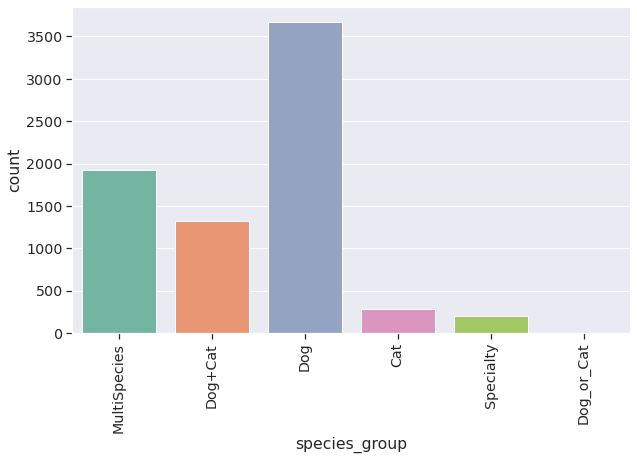

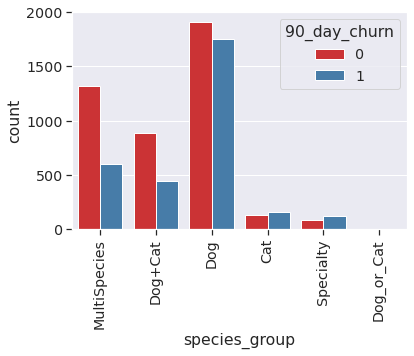

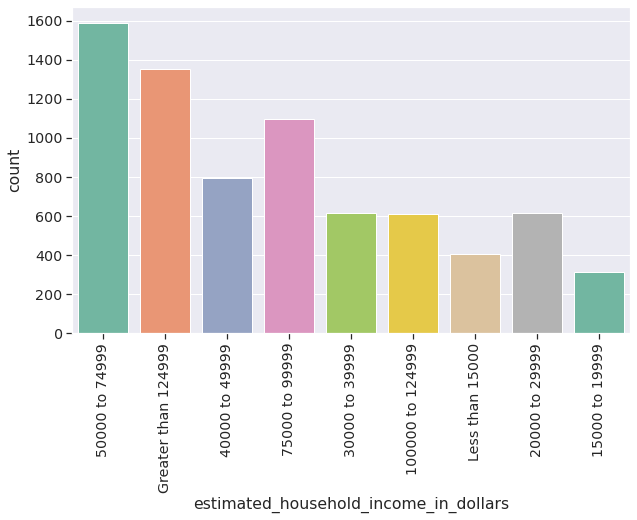

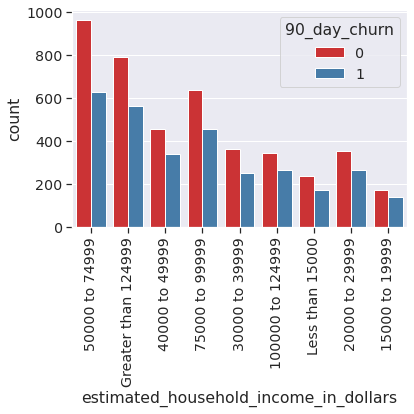

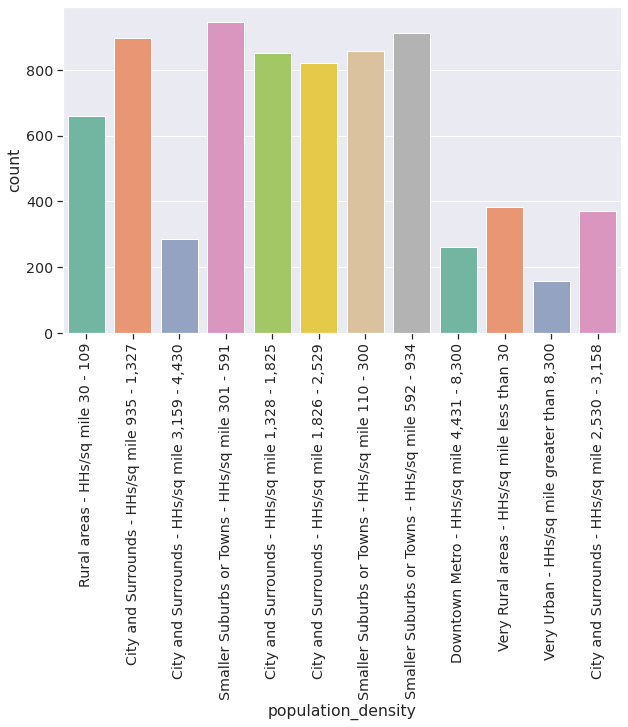

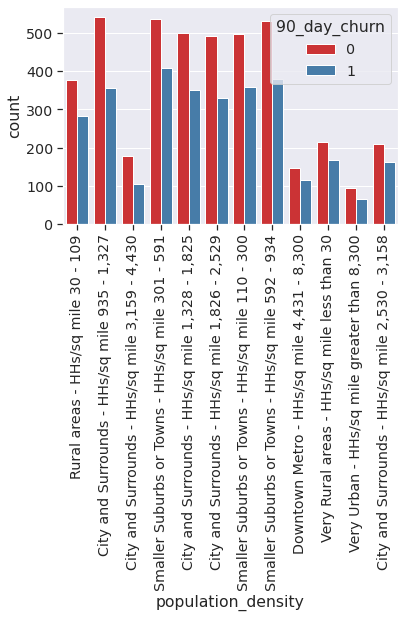

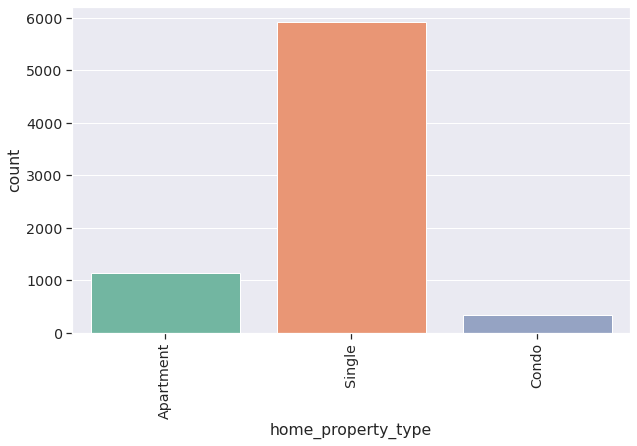

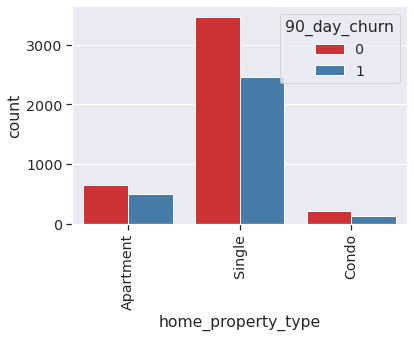

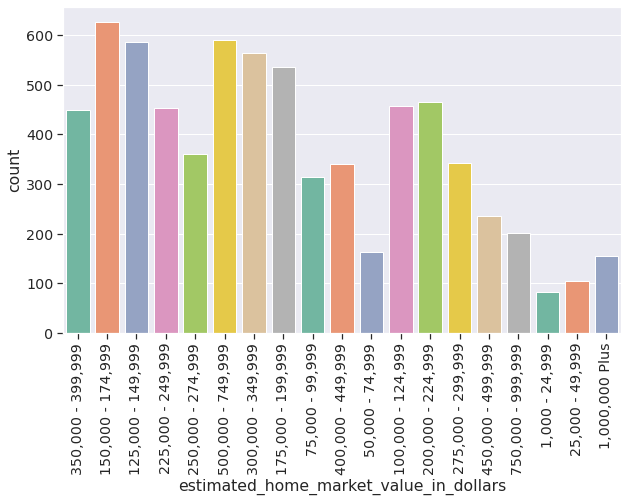

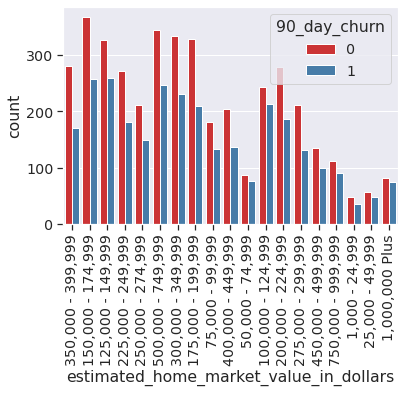

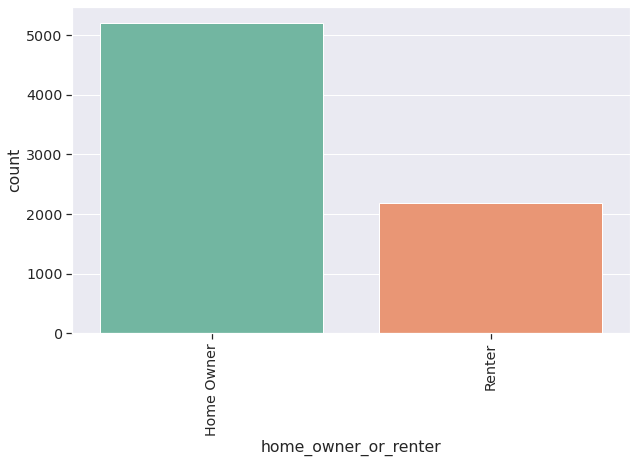

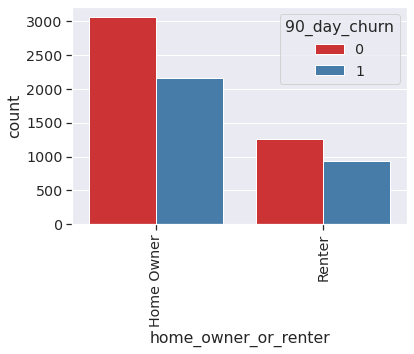

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        fig = plt.figure(figsize = (10,6))
        sns.countplot(x = df[column] , data = df,palette="Set2")
        plt.xticks(rotation=90)
        plt.show()
        sns.countplot(x = df[column] , data = df, hue='90_day_churn', palette="Set1")
        plt.xticks(rotation=90)
        plt.show()
        
        

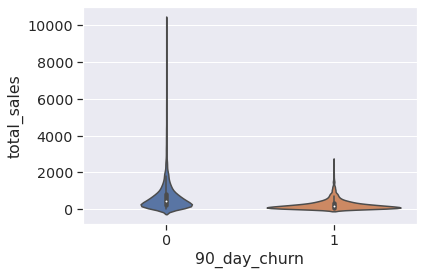

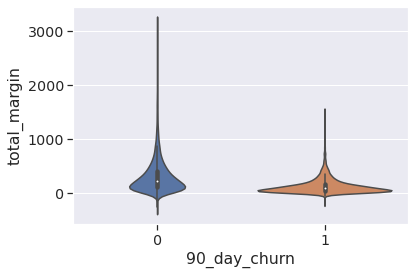

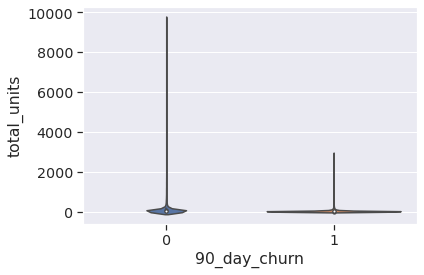

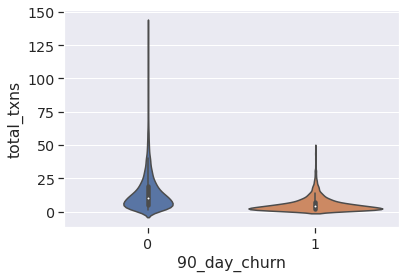

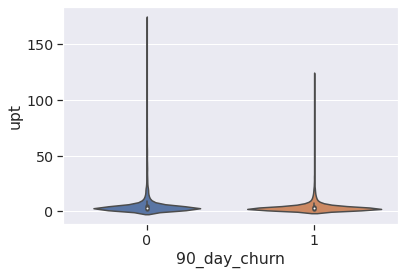

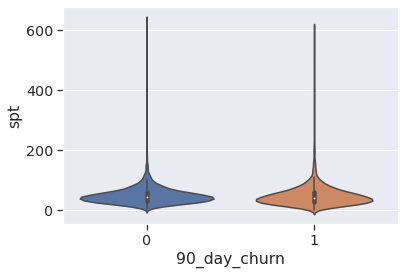

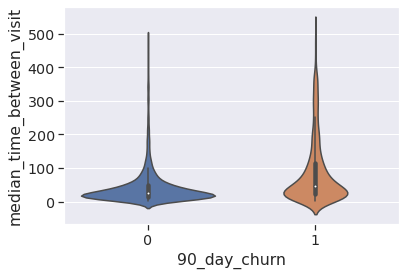

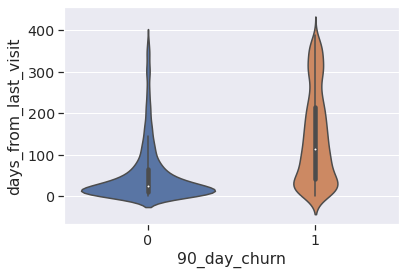

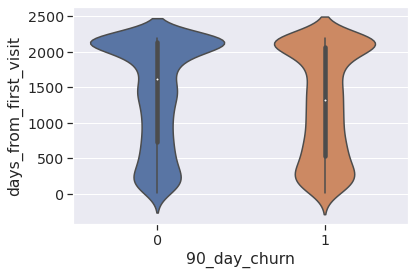

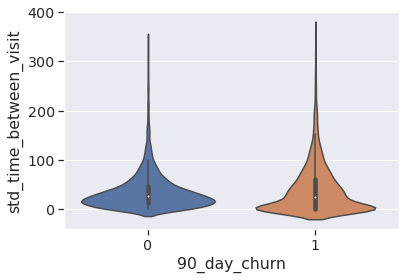

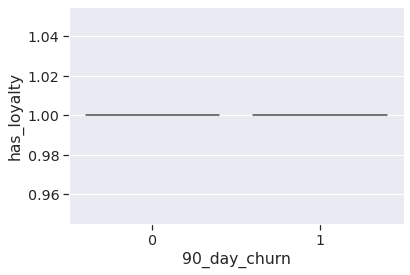

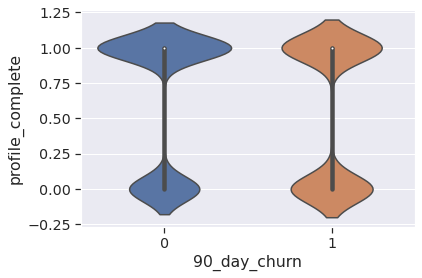

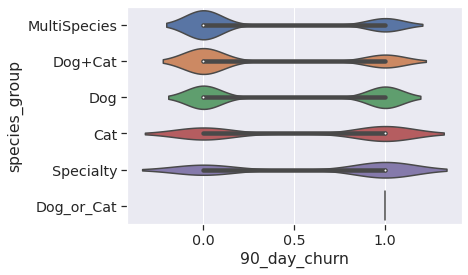

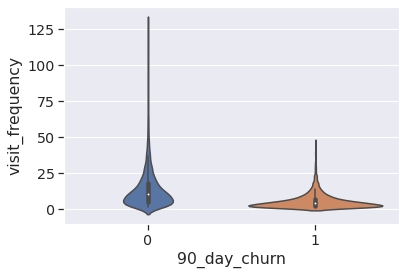

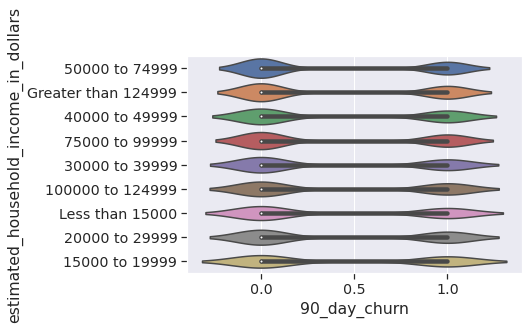

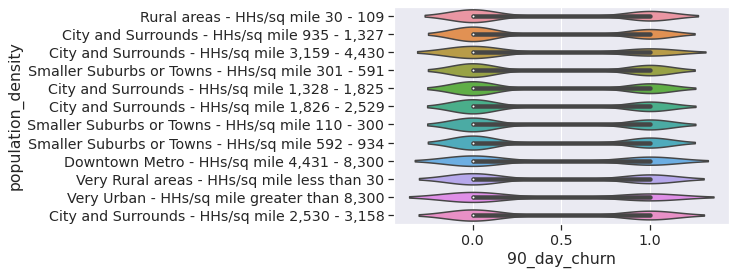

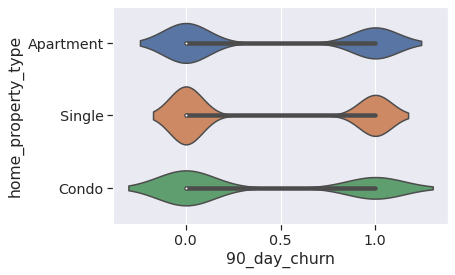

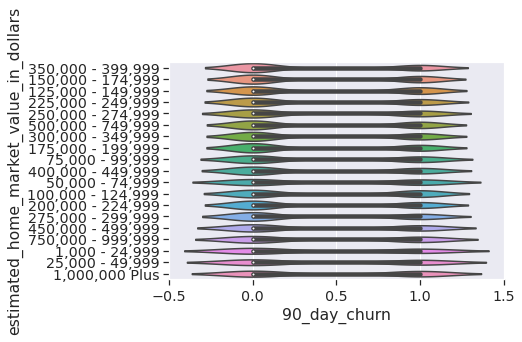

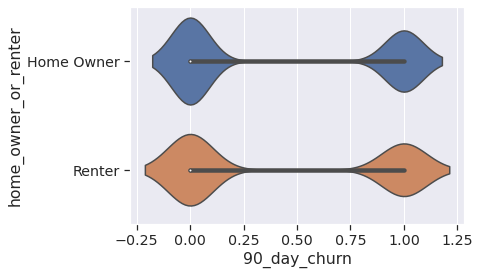

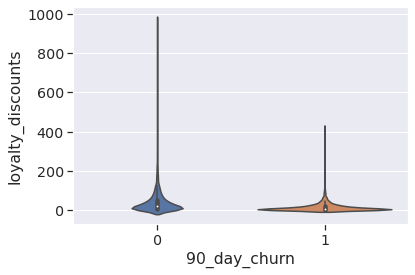

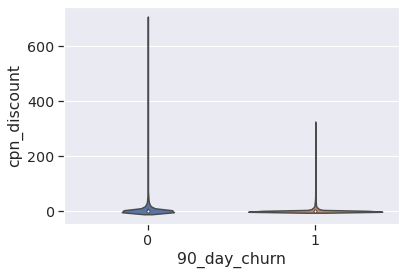

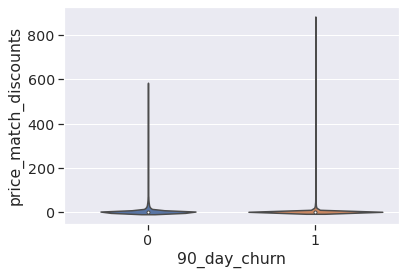

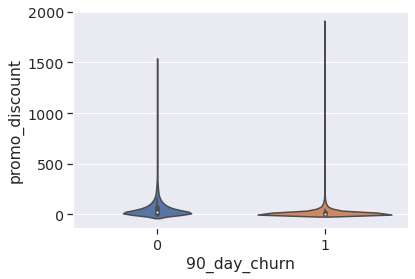

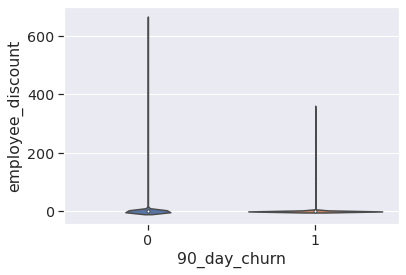

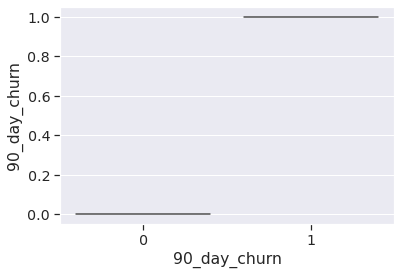

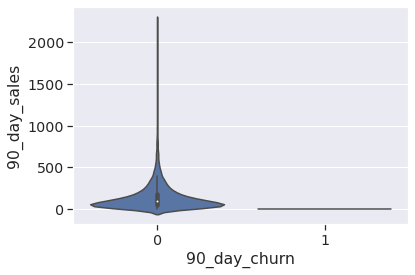

In [ ]:
for column in df.columns:
    sns.violinplot(y=column, data=df, x='90_day_churn')
    plt.show()

In [ ]:
df.columns

Index(['total_sales', 'total_margin', 'total_units', 'total_txns', 'upt',
       'spt', 'median_time_between_visit', 'days_from_last_visit',
       'days_from_first_visit', 'std_time_between_visit', 'has_loyalty',
       'profile_complete', 'species_group', 'visit_frequency',
       'estimated_household_income_in_dollars', 'population_density',
       'home_property_type', 'estimated_home_market_value_in_dollars',
       'home_owner_or_renter', 'loyalty_discounts', 'cpn_discount',
       'price_match_discounts', 'promo_discount', 'employee_discount',
       '90_day_churn', '90_day_sales'],
      dtype='object')

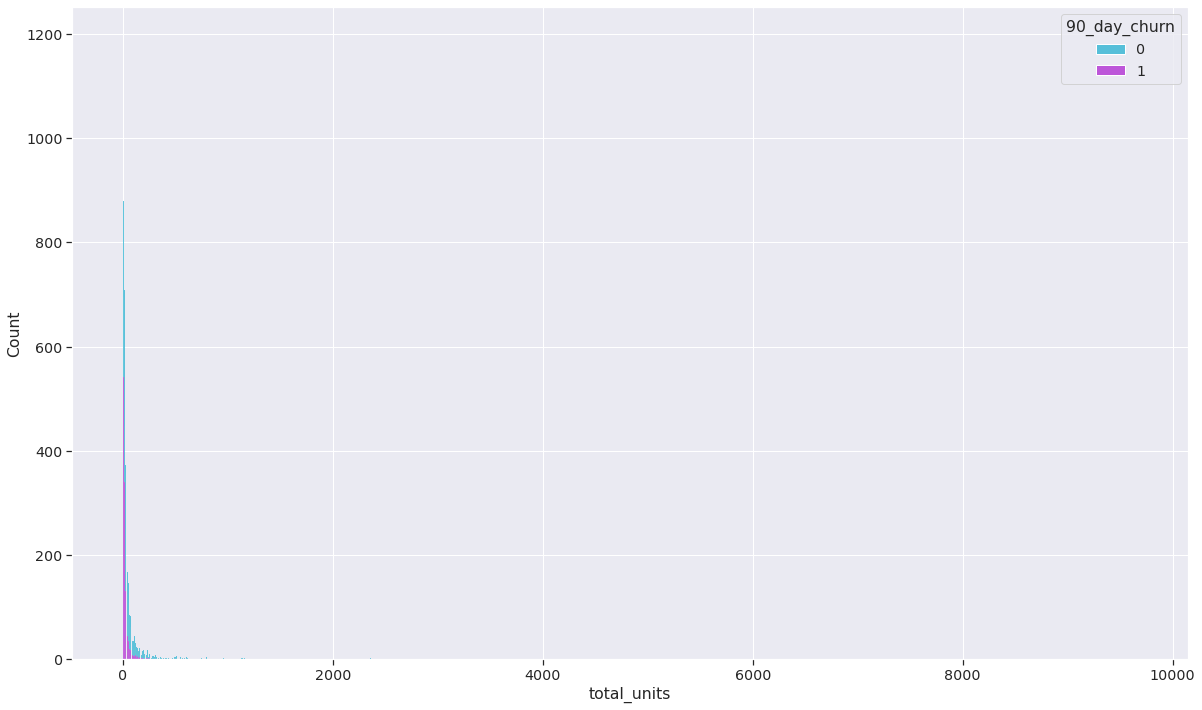

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = sns.histplot(df,
    x='total_units',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    #weights='tip',
    hue='90_day_churn',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

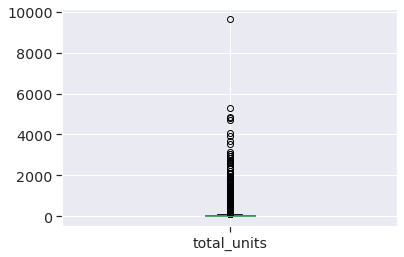

In [ ]:
df.total_units.plot(kind='box')

In [ ]:
df.sort_values(by='total_units', ascending=False)

,total_sales,total_margin,total_units,total_txns,upt,spt,median_time_between_visit,days_from_last_visit,days_from_first_visit,std_time_between_visit,has_loyalty,profile_complete,species_group,visit_frequency,estimated_household_income_in_dollars,population_density,home_property_type,estimated_home_market_value_in_dollars,home_owner_or_renter,loyalty_discounts,cpn_discount,price_match_discounts,promo_discount,employee_discount,90_day_churn,90_day_sales
4439,6535.74,45.605,9665,59,163.8136,110.7753,6,0,399,7.23,1,1,Dog+Cat,50,Greater than 124999,"City and Surrounds - HHs/sq mile 935 - 1,327",Single,"250,000 - 274,999",Home Owner,964.82,60.00,0.00,1024.82,0.0,0,1012.23
6300,2143.16,1463.064,5308,31,171.2258,69.1342,11,1,2184,29.29,1,1,MultiSpecies,31,50000 to 74999,Very Rural areas - HHs/sq mile less than 30,Single,"175,000 - 199,999",Home Owner,264.98,0.00,26.70,291.68,0.0,0,585.77
5723,658.91,500.756,4831,58,83.2931,11.3605,9,6,1651,4.10,1,1,Specialty,57,30000 to 39999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Single,"125,000 - 149,999",Renter,164.40,3.00,0.00,167.40,0.0,0,73.78
2027,2472.50,1103.620,4792,110,43.5636,22.4773,5,6,2192,3.18,1,1,MultiSpecies,98,50000 to 74999,"City and Surrounds - HHs/sq mile 935 - 1,327",Apartment,"50,000 - 74,999",Renter,282.38,7.00,45.57,334.95,0.0,0,780.36
4334,3239.81,-4.633,4711,45,104.6889,71.9958,12,16,2183,10.37,1,1,Dog+Cat,37,20000 to 29999,"City and Surrounds - HHs/sq mile 935 - 1,327",Single,"300,000 - 349,999",Home Owner,275.04,280.04,4.31,559.39,0.0,0,535.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,116.99,81.126,1,1,1.0000,116.9900,303,303,303,0.00,1,1,Dog,1,Less than 15000,"City and Surrounds - HHs/sq mile 935 - 1,327",Single,"50,000 - 74,999",Renter,13.00,0.00,0.00,13.00,0.0,0,45.46
4949,52.99,16.986,1,1,1.0000,52.9900,263,263,263,0.00,1,1,Dog,1,100000 to 124999,Rural areas - HHs/sq mile 30 - 109,Single,"400,000 - 449,999",Home Owner,0.00,0.00,0.00,0.00,0.0,1,0.00
1211,5.99,4.915,1,1,1.0000,5.9900,206,206,1482,0.00,1,0,Specialty,1,100000 to 124999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Apartment,"75,000 - 99,999",Home Owner,0.00,0.00,0.00,0.00,0.0,1,0.00
405,62.99,31.158,1,1,1.0000,62.9900,268,268,268,0.00,1,1,Dog,1,75000 to 99999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Single,NaN,Home Owner,7.00,0.00,0.00,7.00,0.0,1,0.00


In [ ]:
df.columns

Index(['total_sales', 'total_margin', 'total_units', 'total_txns', 'upt',
       'spt', 'median_time_between_visit', 'days_from_last_visit',
       'days_from_first_visit', 'std_time_between_visit', 'has_loyalty',
       'profile_complete', 'species_group', 'visit_frequency',
       'estimated_household_income_in_dollars', 'population_density',
       'home_property_type', 'estimated_home_market_value_in_dollars',
       'home_owner_or_renter', 'loyalty_discounts', 'cpn_discount',
       'price_match_discounts', 'promo_discount', 'employee_discount',
       '90_day_churn', '90_day_sales'],
      dtype='object')

In [ ]:
df[['days_from_last_visit', 'visit_frequency','median_time_between_visit', 'total_sales']]

,days_from_last_visit,visit_frequency,median_time_between_visit,total_sales
0,2,8,69,356.74
1,3,47,4,964.08
2,128,7,8,311.67
3,251,1,251,50.45
4,234,6,63,255.74
...,...,...,...,...
7398,307,2,31,116.66
7399,1,6,7,581.85
7400,18,1,18,12.48
7401,59,11,41,349.48


#### Corelation matrix

In [ ]:
# define a temporary data frame
df_c=df.copy()

In [ ]:
# select the features with "Object" data type
df_Obj = df_c.select_dtypes(include='object')

# check the number of columns with "Object" data type
df_Obj.shape

(7403, 6)

In [ ]:
# define a lambda function to be used to convert object type to 
# categorical data type
categorize_label = lambda x: x.astype('category').cat.codes

# convert the columns with "Object" data type to "Categorical" data type
df_c[df_Obj.columns] = df_c[df_Obj.columns].apply(categorize_label, axis=0)

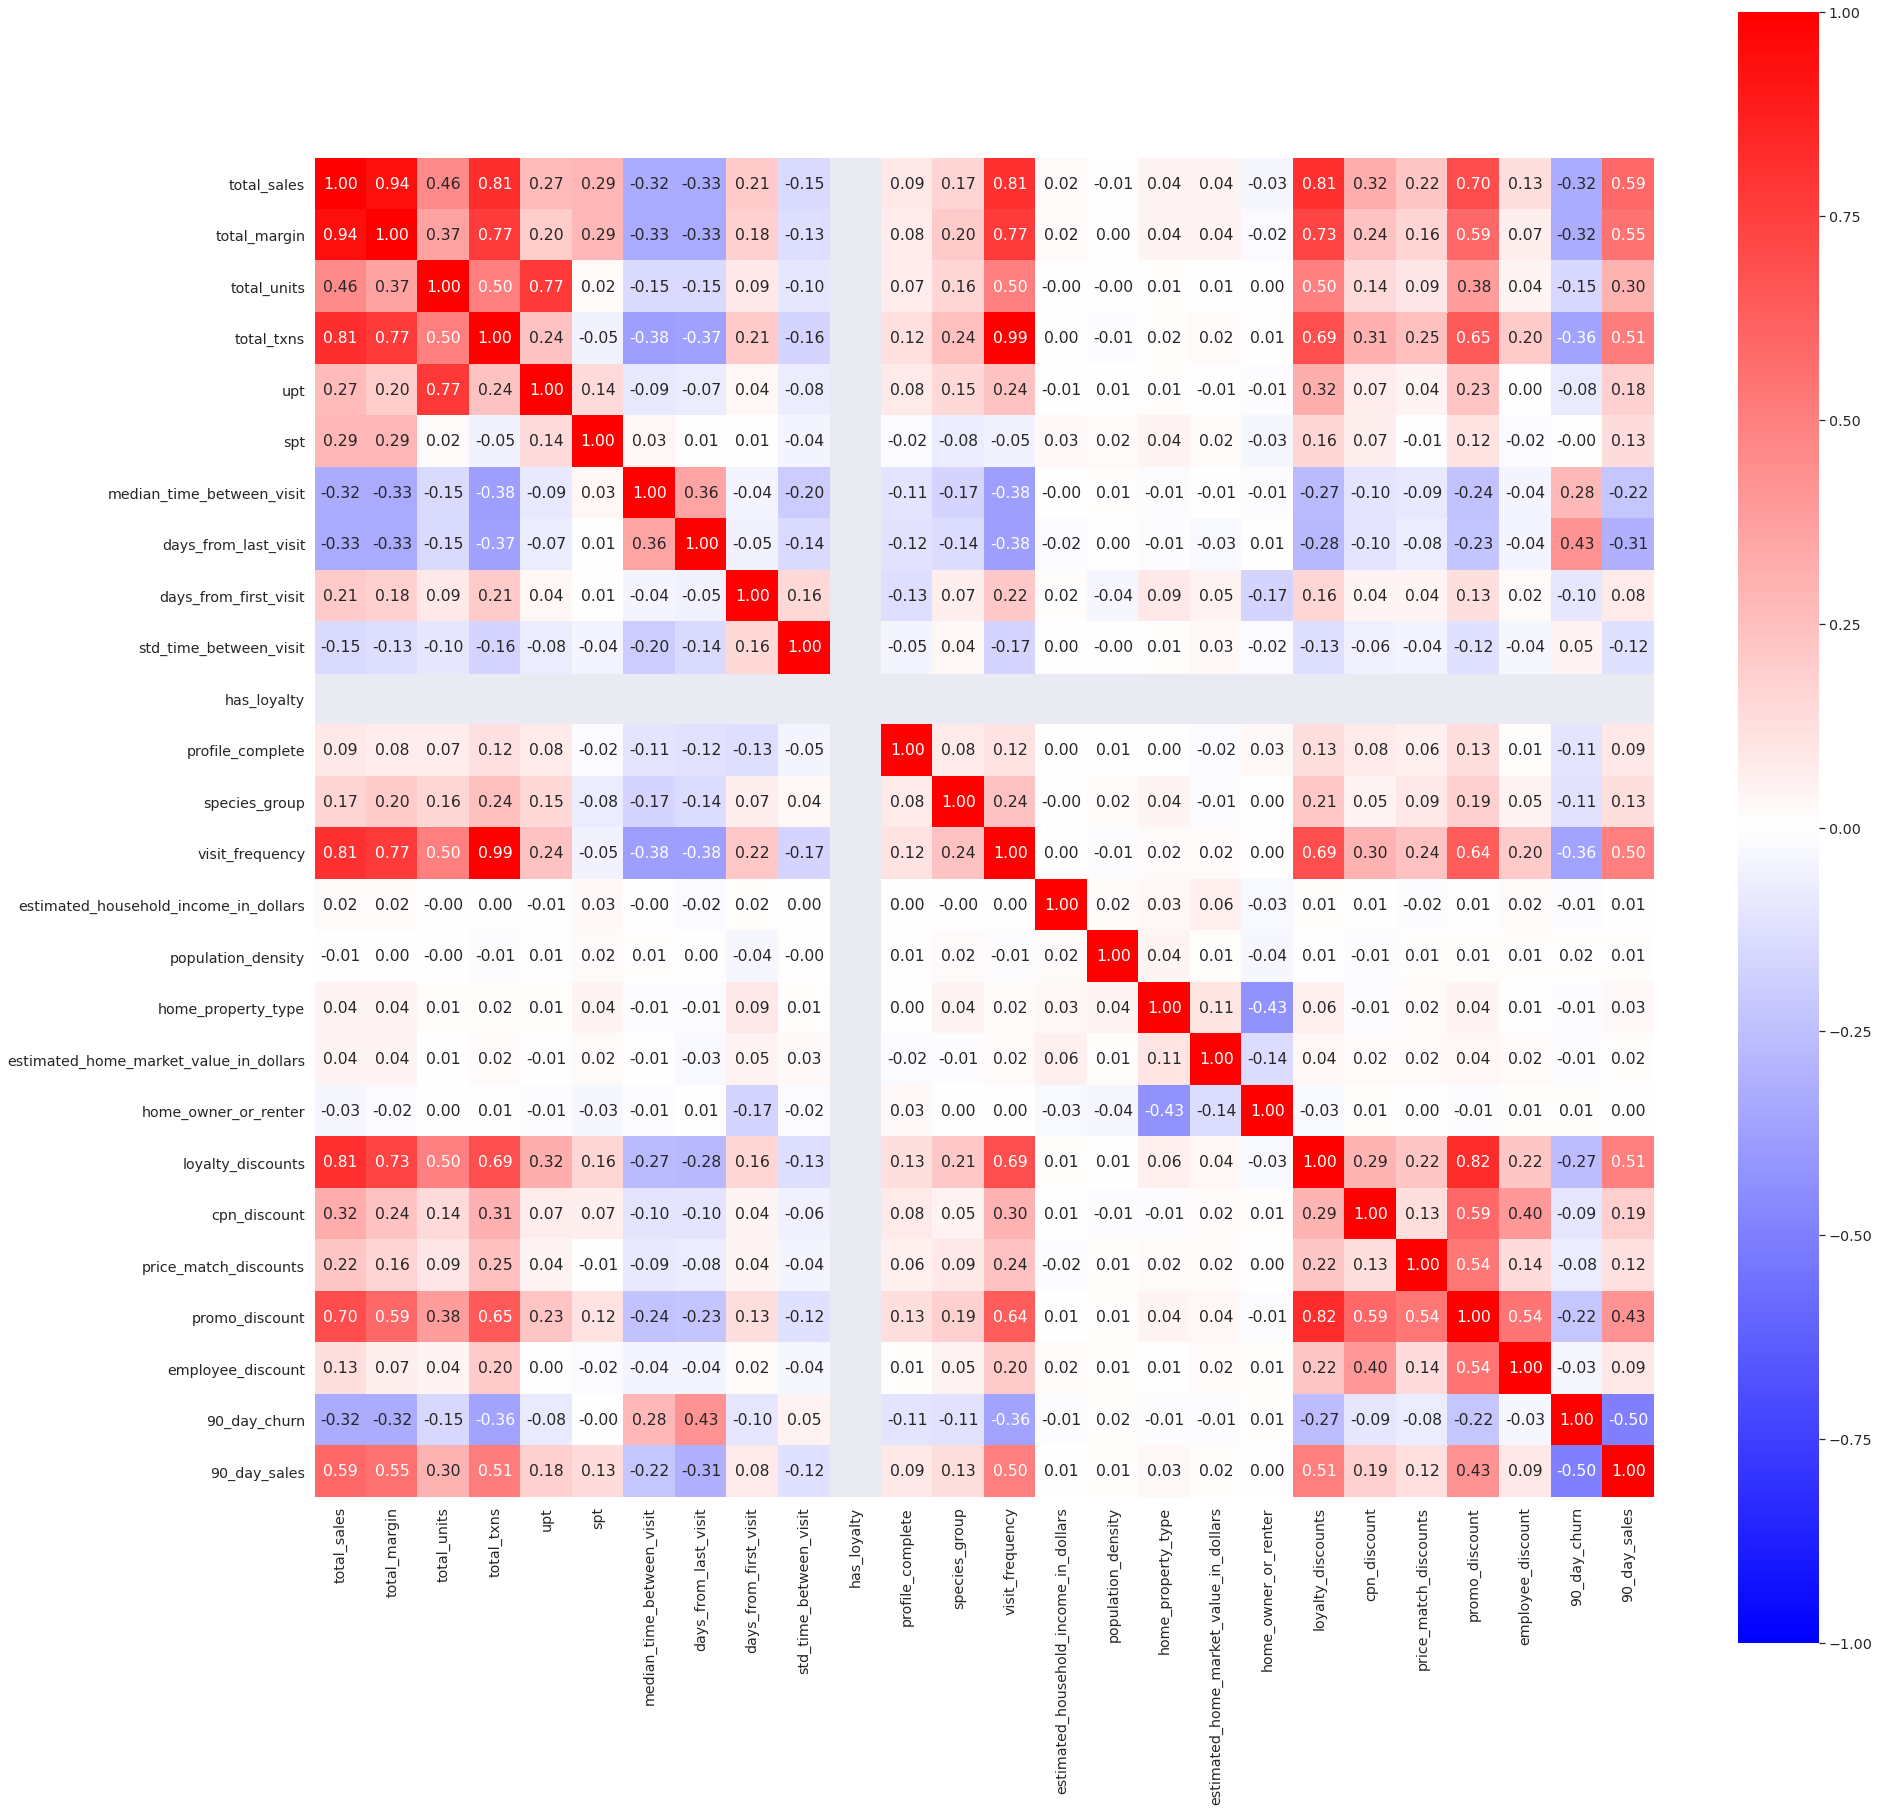

In [ ]:
# Now let's visualize the correlations 
# Generate a mask for the upper triangle
mask = np.zeros_like(df_c.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


_ = plt.figure(figsize=(30,30))
_ = sns.set(font_scale=1.3)
ax = sns.heatmap(df_c.corr(), vmin=-1, vmax=1,square=True, 
                 annot=True, cmap='bwr', cbar=True, fmt=".2f")


# display the heatmap
plt.show()

### Feature Selection

#### Dealing with the Rows Which Contain Missing Values¶



In [ ]:
df1=df.copy()


In [ ]:
df1=df1.dropna(axis=0)

In [ ]:
df1.isnull().sum()

total_sales                               0
total_margin                              0
total_units                               0
total_txns                                0
upt                                       0
spt                                       0
median_time_between_visit                 0
days_from_last_visit                      0
days_from_first_visit                     0
std_time_between_visit                    0
has_loyalty                               0
profile_complete                          0
species_group                             0
visit_frequency                           0
estimated_household_income_in_dollars     0
population_density                        0
home_property_type                        0
estimated_home_market_value_in_dollars    0
home_owner_or_renter                      0
loyalty_discounts                         0
cpn_discount                              0
price_match_discounts                     0
promo_discount                  

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7402
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_sales                             7033 non-null   float64
 1   total_margin                            7033 non-null   float64
 2   total_units                             7033 non-null   int64  
 3   total_txns                              7033 non-null   int64  
 4   upt                                     7033 non-null   float64
 5   spt                                     7033 non-null   float64
 6   median_time_between_visit               7033 non-null   int64  
 7   days_from_last_visit                    7033 non-null   int64  
 8   days_from_first_visit                   7033 non-null   int64  
 9   std_time_between_visit                  7033 non-null   float64
 10  has_loyalty                             7033 non-null   int6

#### Feature Selection for Object Data Type

In [ ]:
# select the features with "Object" data type
df1_Obj = df1.select_dtypes(include='object')

df1_Obj.shape

(7033, 6)

In [ ]:
# description of features with "Object" data type
df1_Obj.describe(include=['O'])

,species_group,estimated_household_income_in_dollars,population_density,home_property_type,estimated_home_market_value_in_dollars,home_owner_or_renter
count,7033,7033,7033,7033,7033,7033
unique,6,9,12,3,19,2
top,Dog,50000 to 74999,Smaller Suburbs or Towns - HHs/sq mile 301 - 591,Single,"150,000 - 174,999",Home Owner
freq,3497,1510,897,5630,626,4960


#### One Hot Encoding

In [ ]:
df1 = pd.get_dummies(df1, drop_first=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7402
Data columns (total 65 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   total_sales                                                          7033 non-null   float64
 1   total_margin                                                         7033 non-null   float64
 2   total_units                                                          7033 non-null   int64  
 3   total_txns                                                           7033 non-null   int64  
 4   upt                                                                  7033 non-null   float64
 5   spt                                                                  7033 non-null   float64
 6   median_time_between_visit                                            7033 non-null   int64  
 7   days_f

### Model Selection

In [ ]:
# extract the features and the response variable
y = df1['90_day_churn']
X = df1.drop('90_day_churn', axis=1)

#### Detecting multicolinearity
 

When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.

In [ ]:
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data[vif_data['VIF']>5])

                                              feature         VIF
0                                         total_sales   17.323242
1                                        total_margin   11.361331
3                                          total_txns  102.505052
10                                        has_loyalty  156.071882
12                                    visit_frequency   99.495089
13                                  loyalty_discounts   19.784051
15                              price_match_discounts    6.190655
16                                     promo_discount   45.863124
19                                  species_group_Dog    7.552174
22                         species_group_MultiSpecies    6.288367
46  estimated_home_market_value_in_dollars_100,000...    6.171043
47  estimated_home_market_value_in_dollars_125,000...    7.486763
48  estimated_home_market_value_in_dollars_150,000...    7.900589
49  estimated_home_market_value_in_dollars_175,000...    7.028601
50  estima

In [ ]:
# features has to be dropped to prevent multicolinarity
X.drop(['total_sales','has_loyalty','total_txns','promo_discount','total_margin','species_group_Dog','home_property_type_Single','visit_frequency','90_day_sales'], axis=1, inplace=True)

In [ ]:
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data[vif_data['VIF']>5])

Empty DataFrame
Columns: [feature, VIF]
Index: []


#### Splitting Data into Training and Test Sets

In [ ]:
# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

##### Feature Scaling

In [ ]:
# scale X_train numeric continuous features
scaler = StandardScaler()
numeric_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].to_list()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [ ]:
# scale X_test numeric continuous features
numeric_cols = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].to_list()
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
y_train.value_counts()

0    3079
1    2195
Name: 90_day_churn, dtype: int64

###  Modeling (Imbalanced Data)

#### Comparison of Models

**Functions for Algorithms Comparison**

In [ ]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df = df[[ 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index([ 'model', 'accuracy', 'class'])

**Function for f1 Score Plotting**

In [ ]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

#### Confusion Matrix Plot Function

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.summer):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [ ]:
def disp_confusion_matrix(y_pred, model_name):
    """
    Display confusion matrix for selected model
    """
    
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    
    plot = plot_confusion_matrix(cm, classes=['0','1'], normalize=False, 
                                 title = model_name  + " "+ '\nConfusion Matrix')
    
    
    
    plt.show()

#### Creating a function for applying different algorithms

In [ ]:
def modeling(Model, Xtrain = X_train, Xtest =X_test ):
    """
    This function apply  with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    cv=cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    print('')
    # Print the 3-fold cross-validation scores
    print("Average 3-Fold CV Accuracy Score: {}".format(np.mean(cv)))

#### Model Fitting

> * logistic regression

##### Logistic Regression

In [ ]:
# Call the modeling function for logistic regression  and print f1 score
modeling(LogisticRegression(solver = 'newton-cg',
                            n_jobs=-1,
                            class_weight = 'imbalanced',
                            random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.7208859325528985

Average 3-Fold CV Accuracy Score: 0.7262040197193781


              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1027
           1       0.70      0.59      0.64       732

    accuracy                           0.73      1759
   macro avg       0.72      0.71      0.71      1759
weighted avg       0.72      0.73      0.72      1759



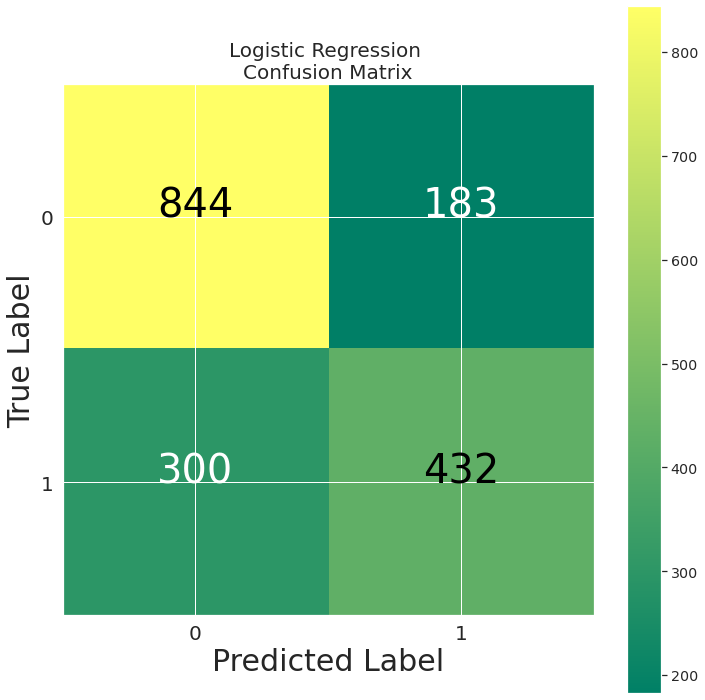

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

# Print confusion matrix for logistic regression 
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")


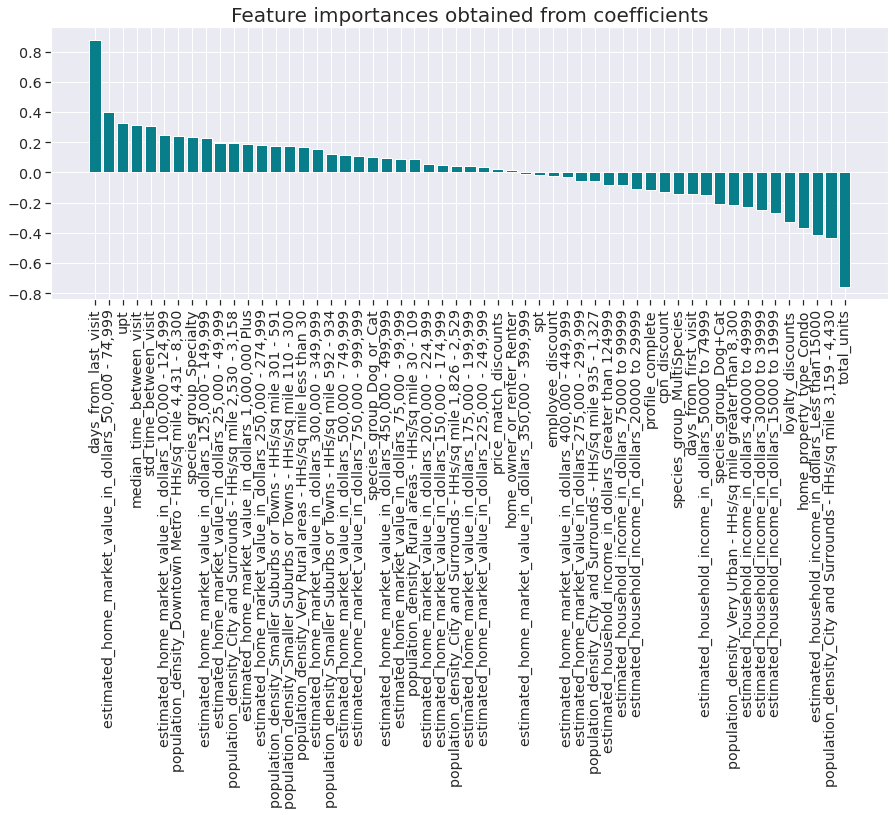

In [ ]:
##   # model prediction for logistic regression
logreg=LogisticRegression()
##   # Fit it to the data
logreg.fit(X_train, y_train)

##   # Predict the labels of the test set
y_pred = logreg.predict(X_test)

importances=pd.DataFrame(data={'Attribute':X.columns,'Importance':logreg.coef_[0]})

importances=importances.sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'],color='#087E8B')
plt.title('Feature importances obtained from coefficients',size=20)
plt.xticks(rotation='vertical')
plt.show()
##   # generate the classification report
##   print(classification_report(y_test, y_pred))

##   # plot the confusion matrix
##   cm = confusion_matrix(y_test, y_pred)
##   ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
##   ax.set_xlabel('Predicted Value')
##   ax.set_ylabel('Actual Value')
##   # bottom, top = ax.get_ylim()
##   # ax.set_ylim(bottom + 0.5, top - 0.5)

##   # display the plot
##   plt.show()

##### KNN

In [ ]:
# Call the modeling function for knn and print f1 score
modeling(KNeighborsClassifier(n_neighbors=7), X_train, X_test)
# Assign y_pred to a variable for further process
y_pred_knn = y_pred

f1 score: 0.67765672309237

Average 3-Fold CV Accuracy Score: 0.7021236253318165


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1027
           1       0.64      0.55      0.59       732

    accuracy                           0.68      1759
   macro avg       0.67      0.66      0.66      1759
weighted avg       0.68      0.68      0.68      1759



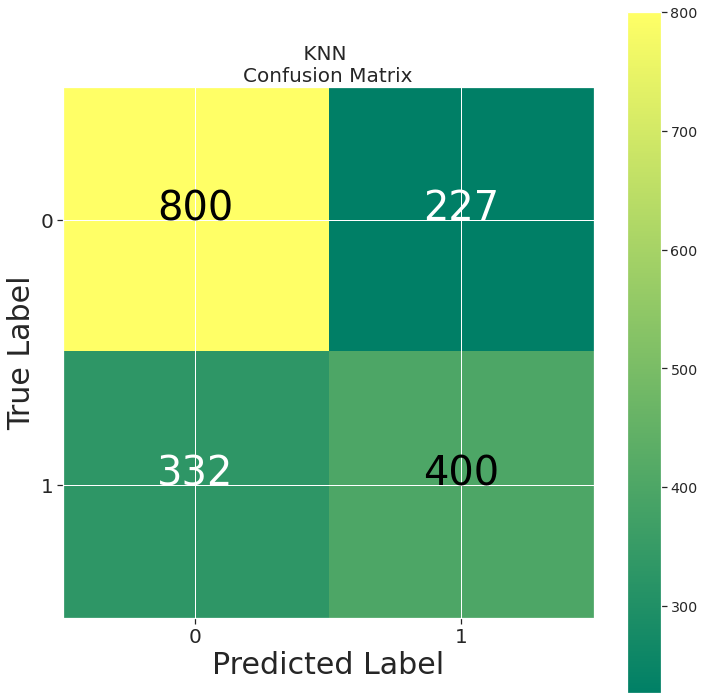

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_knn))
# Print confusion matrix for knn 
disp_confusion_matrix(y_pred_knn, " KNN ")

##### Naive  Bayes

In [ ]:
# Call the modeling function for naive bayes  and print f1 score
modeling(GaussianNB(), X_train, X_test)

# Assign y_pred to a variable for further process
y_pred_nb = y_pred

f1 score: 0.6648731936860508

Average 3-Fold CV Accuracy Score: 0.6446719757299962


**Classification Report and Confusion Matrix**

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      1027
           1       0.72      0.41      0.52       732

    accuracy                           0.69      1759
   macro avg       0.70      0.65      0.64      1759
weighted avg       0.69      0.69      0.66      1759



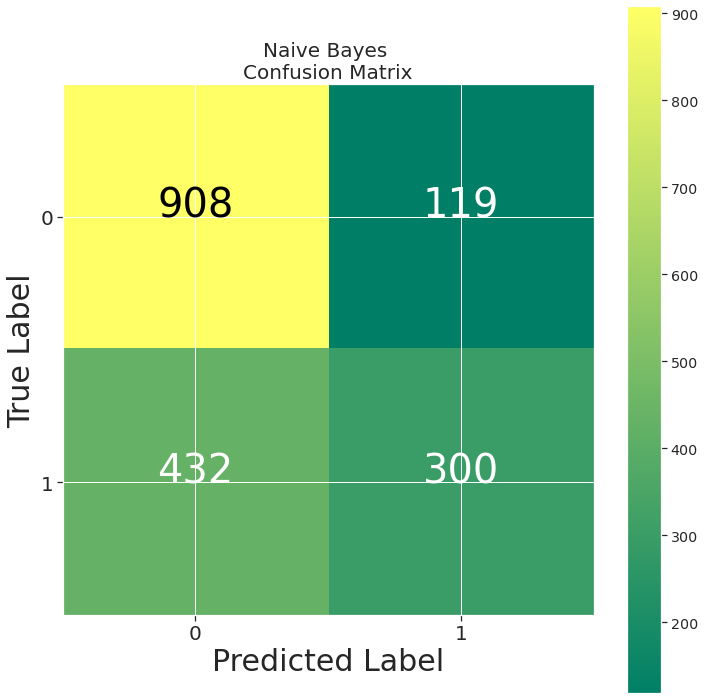

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_nb))
# Print confusion matrix for naive bayes
disp_confusion_matrix(y_pred_nb, "Naive Bayes")

##### Random Forest + SMOTE

In [ ]:
# Call the modeling function for random forest classifier and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         X_train, X_test)

# Assign y_pred to a variable for further process
y_pred_rf = y_pred

f1 score: 0.7354688314733974

Average 3-Fold CV Accuracy Score: 0.7292377701934015


              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1027
           1       0.68      0.69      0.69       732

    accuracy                           0.74      1759
   macro avg       0.73      0.73      0.73      1759
weighted avg       0.74      0.74      0.74      1759



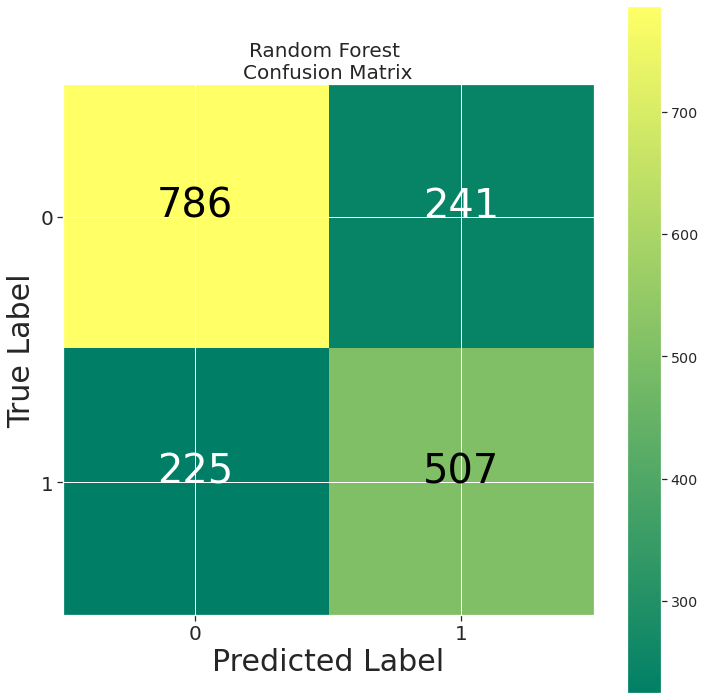

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_rf))
# Print confusion matrix for random forest classifier 
disp_confusion_matrix(y_pred_rf, "Random Forest")

#### <b> Comparision of Models

In [ ]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_knn, y_pred_nb, y_pred_rf], 
                labels = ['LogReg','KNN','Naive Bayes', 'Random Forest' ])

<b>Comparison Table

In [ ]:
df_tv2

precision    recall  f1-score  support
model         accuracy class                                          
LogReg        0.725412 bad       0.737762  0.821811  0.777522   1027.0
                       good      0.702439  0.590164  0.641425    732.0
                       average   0.723063  0.725412  0.720886   1759.0
KNN           0.682206 bad       0.706714  0.778968  0.741084   1027.0
                       good      0.637959  0.546448  0.588668    732.0
                       average   0.678102  0.682206  0.677657   1759.0
Naive Bayes   0.686754 bad       0.677612  0.884129  0.767216   1027.0
                       good      0.715990  0.409836  0.521286    732.0
                       average   0.693583  0.686754  0.664873   1759.0
Random Forest 0.735077 bad       0.777448  0.765336  0.771344   1027.0
                       good      0.677807  0.692623  0.685135    732.0
                       average   0.735983  0.735077  0.735469   1759.0

<b>Average f1 score - Models

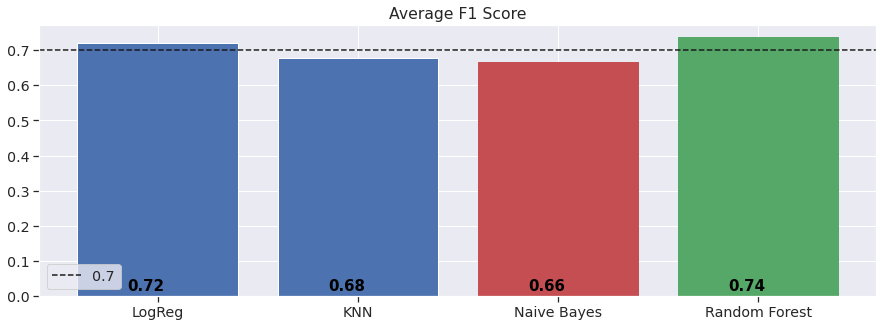

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

### Model Building (Balanced Data)

In [ ]:
def disp_confusion_matrix(y_pred, model_name):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    
    plot = plot_confusion_matrix(cm, classes=['0','1'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + 'SMOTE' + " "+ '\nConfusion Matrix')
    
    
    
    plt.show()

In [ ]:
def modeling (Model, Xtrain ,ytrain):
    """
    This function apply  with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

<b>Balancing Training Dataset - SMOTE

In [ ]:
#import neccessary packages
from collections import Counter
from imblearn.over_sampling import SMOTE

# oversampling using SMOTE
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_sample(X_train,y_train)

df_text=X_train
df_target=y_train

# Print shape of X_train andy_train
print(df_text.shape)
print(df_target.shape)

(6158, 55)
(6158,)


In [ ]:
from collections import Counter
Counter(y_train) # Alternative way we can use `df_target.value_counts()`

Counter({0: 3079, 1: 3079})

#### Logistic Regression + SMOTE

In [ ]:
# Call the modeling function for logistic regression 
modeling(LogisticRegression( solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, 
                            random_state = 42), Xtrain = df_text, ytrain = df_target)
# Print f1 score

y_pred_sm_logreg=y_pred

f1 score: 0.7285839039154723


              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1027
           1       0.66      0.70      0.68       732

    accuracy                           0.73      1759
   macro avg       0.72      0.72      0.72      1759
weighted avg       0.73      0.73      0.73      1759



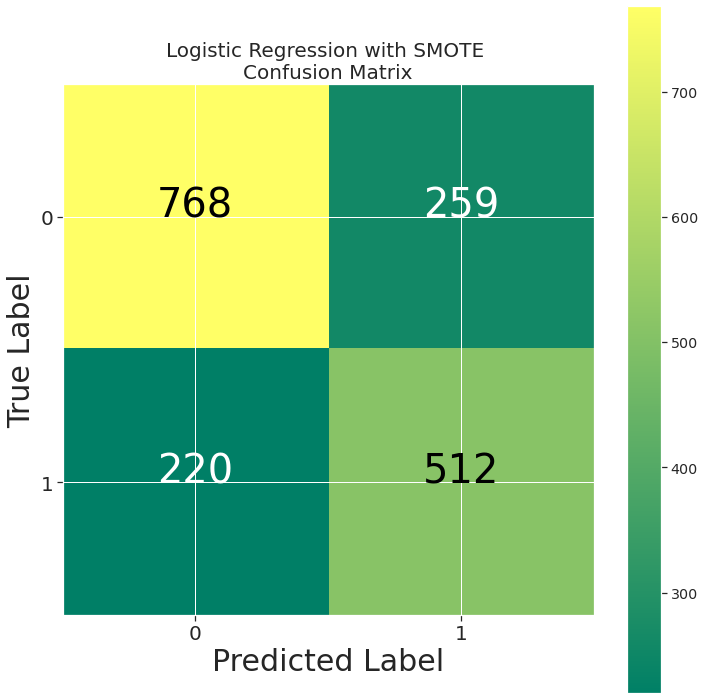

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_logreg))

# Print confusion matrix for logistic regression 
disp_confusion_matrix(y_pred_sm_logreg, "Logistic Regression")

#### KNN

In [ ]:
# Call the modeling function for knn and print f1 score
modeling(KNeighborsClassifier(n_neighbors=7), Xtrain = df_text, ytrain = df_target)
# Assign y_pred to a variable for further process
y_pred_sm_knn = y_pred

f1 score: 0.673097668882657


              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1027
           1       0.59      0.69      0.63       732

    accuracy                           0.67      1759
   macro avg       0.67      0.67      0.67      1759
weighted avg       0.68      0.67      0.67      1759



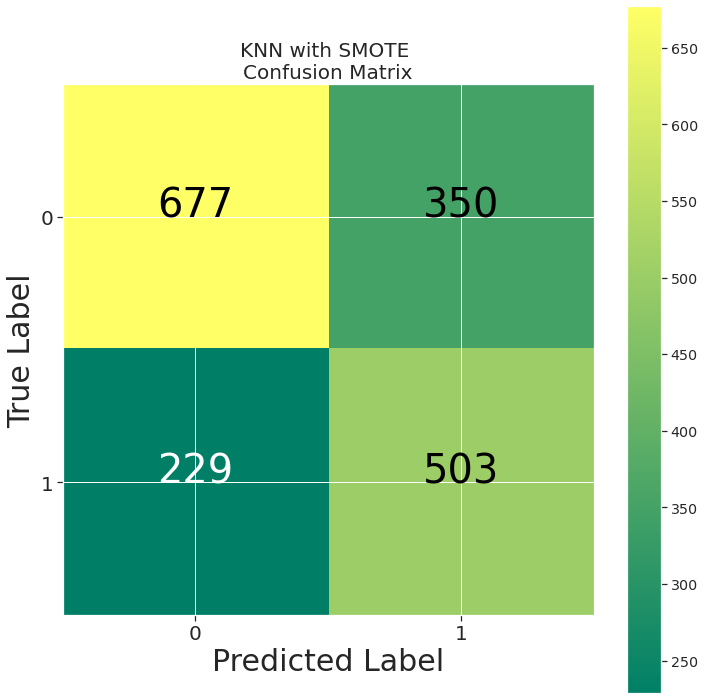

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_knn))

# Print confusion matrix for random forest classifier
disp_confusion_matrix(y_pred_sm_knn, "KNN")

#### Naive Bayes

In [ ]:
# Call the modeling function for naive bayes  and print f1 score
modeling(GaussianNB(), Xtrain = df_text, ytrain = df_target)

# Assign y_pred to a variable for further process
y_pred_sm_nb = y_pred

f1 score: 0.6856120186640838


              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1027
           1       0.70      0.48      0.57       732

    accuracy                           0.70      1759
   macro avg       0.70      0.67      0.67      1759
weighted avg       0.70      0.70      0.69      1759



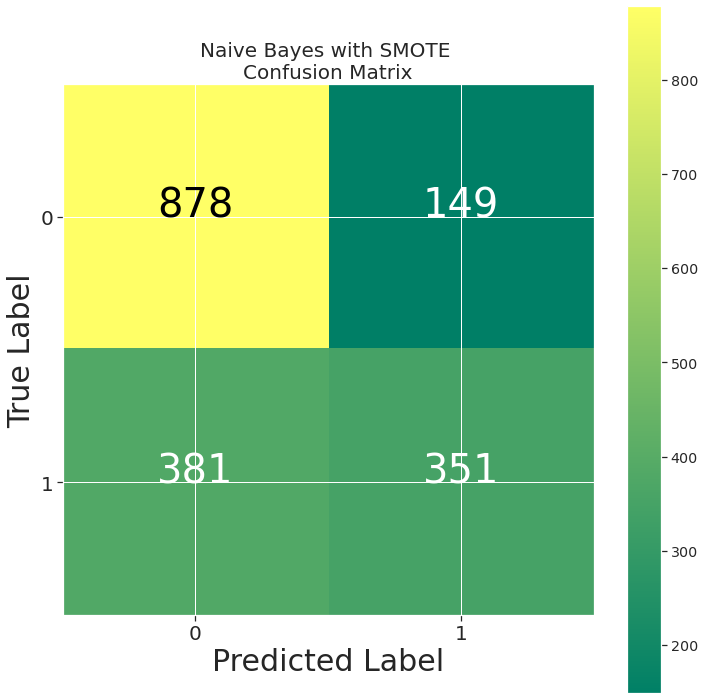

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_nb))

# Print confusion matrix for random forest classifier
disp_confusion_matrix(y_pred_sm_nb, "Naive Bayes")

#### Random Forest

In [ ]:
# Call the modeling function for random forest classifier 
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         Xtrain = df_text, ytrain = df_target)

# Print f1 score
y_pred_sm_rf = y_pred

f1 score: 0.7331800130197638


              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1027
           1       0.66      0.73      0.69       732

    accuracy                           0.73      1759
   macro avg       0.73      0.73      0.73      1759
weighted avg       0.74      0.73      0.73      1759



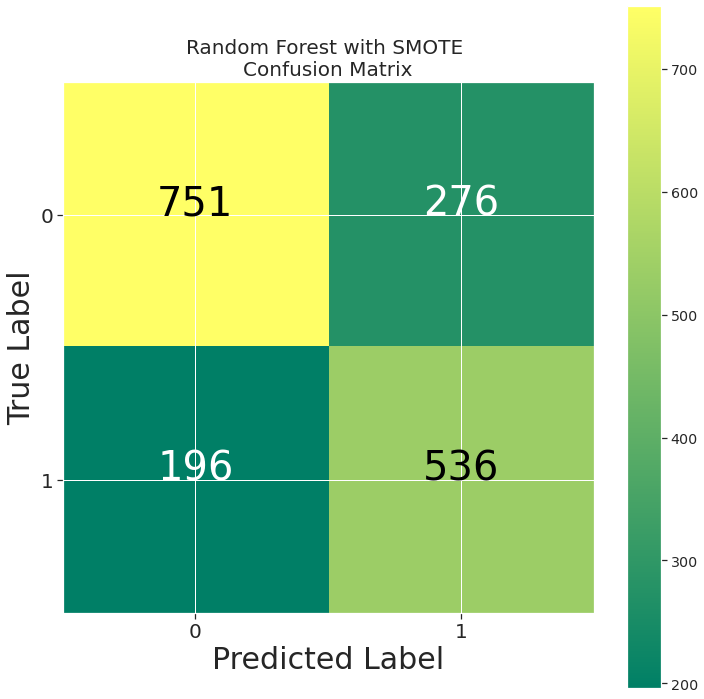

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_rf))

# Print confusion matrix for random forest classifier
disp_confusion_matrix(y_pred_sm_rf, "Random Forest")

#### <b> Comparision of Models

In [ ]:
comparison_table(y_preds = [y_pred_sm_logreg, y_pred_sm_knn, y_pred_sm_nb, y_pred_sm_rf], 
                labels = ['LogReg','KNN','Naive Bayes', 'Random Forest' ])

<b>Comparison Table

In [ ]:
df_tv2

precision    recall  f1-score  support
model         accuracy class                                          
LogReg        0.727686 bad       0.777328  0.747809  0.762283   1027.0
                       good      0.664073  0.699454  0.681304    732.0
                       average   0.730197  0.727686  0.728584   1759.0
KNN           0.670836 bad       0.747241  0.659202  0.700466   1027.0
                       good      0.589683  0.687158  0.634700    732.0
                       average   0.681674  0.670836  0.673098   1759.0
Naive Bayes   0.698692 bad       0.697379  0.854917  0.768154   1027.0
                       good      0.702000  0.479508  0.569805    732.0
                       average   0.699302  0.698692  0.685612   1759.0
Random Forest 0.731666 bad       0.793031  0.731256  0.760892   1027.0
                       good      0.660099  0.732240  0.694301    732.0
                       average   0.737712  0.731666  0.733180   1759.0

<b>Average f1 score - Models

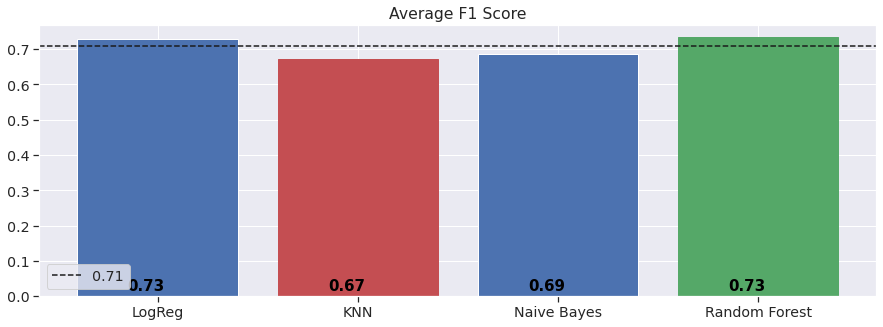

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")